In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
%matplotlib inline

In [2]:
def posterior_grid(grid_points=100, heads=6, tosses=9):
    grid = np.linspace(0, 1, grid_points)
    prior = np.repeat(5, grid_points)
    likelihood = stats.binom.pmf(heads, tosses, grid)
    unstd_postrior = likelihood * prior
    posterior = unstd_postrior / unstd_postrior.sum()
    return grid, posterior

In [3]:
points = 15
h, n = 1, 4
grid, posterior = posterior_grid(points, h, n)
plt.plot(grid, posterior, 'o-', label='heads = {}\ntosses = {}'.format(h, n))
plt.xlabel(r'$\theta$')
plt.legend(loc=0)

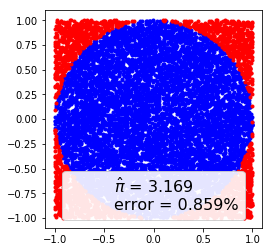

In [4]:
N = 10000

x, y = np.random.uniform(-1, 1, size=(2, N))
inside = (x**2 + y**2) <= 1
pi = inside.sum()*4/N
error = abs((pi - np.pi)/pi) * 100

outside = np.invert(inside)

plt.plot(x[inside], y[inside], 'b.')
plt.plot(x[outside], y[outside], 'r.')
plt.plot(0, 0, label='$\hat \pi$ = {:4.3f}\nerror = {:4.3f}%'.format(pi, error), alpha=0)
plt.axis('square')
plt.legend(frameon=True, framealpha=0.9, fontsize=16)

In [5]:
def metropolis(func, steps=10000):
    samples = np.zeros(steps)
    old_x = func.mean()
    old_prob = func.pdf(old_x)
    
    for i in range(steps):
        new_x = old_x + np.random.normal(0, 0.5)
        new_prob = func.pdf(new_x)
        acceptance = new_prob / old_prob
        if acceptance >= np.random.random():
            samples[i] = new_x
            old_x = new_x
            old_prob = new_prob
        else:
            samples[i] = old_x
    return samples

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


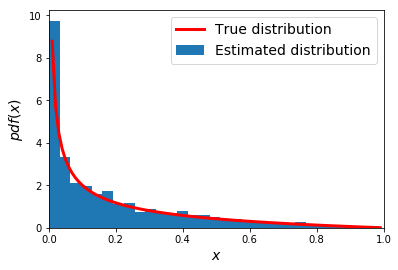

In [6]:
func = stats.beta(0.4, 2)
samples = metropolis(func=func)
x = np.linspace(0.01, 0.99, 100)
y = func.pdf(x)
plt.xlim(0, 1)
plt.plot(x, y, 'r-', lw=3, label='True distribution')
plt.hist(samples, bins=30, normed=True, label='Estimated distribution')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$pdf(x)$', fontsize=14)
plt.legend(fontsize=14)

In [7]:
import pymc3 as pm
np.random.seed(123)
n_experiments = 4
theta_real = 0.35
data = stats.bernoulli.rvs(p=theta_real, size=n_experiments)
print(data)

[1 0 0 0]

In [8]:
with pm.Model() as our_first_model:
    theta = pm.Beta('theta', alpha=1, beta=1)
    y = pm.Bernoulli('y', p=theta, observed=data)

In [9]:
with pm.Model() as our_first_model:
    theta = pm.Beta('theta', alpha=1, beta=1)
    y = pm.Bernoulli('y', p=theta, observed=data)
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(1000, step=step, start=start)

C:\ProgramData\Anaconda3\lib\site-packages\pymc3\tuning\starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')


  0%|          | 0/5000 [00:00<?, ?it/s]

logp = -2.7726, ||grad|| = 1:   0%|          | 0/5000 [00:00<?, ?it/s]

logp = -2.7726, ||grad|| = 1: 100%|██████████| 6/6 [00:00<00:00, 3003.44it/s]

Multiprocess sampling (4 chains in 4 jobs)

Metropolis: [theta]

Sampling 4 chains:   0%|          | 0/6000 [00:00<?, ?draws/s]

Sampling 4 chains:   2%|▏         | 110/6000 [00:00<00:05, 1090.23draws/s]

Sampling 4 chains:   4%|▎         | 223/6000 [00:00<00:05, 1098.98draws/s]

Sampling 4 chains:   6%|▌         | 335/6000 [00:00<00:05, 1102.28draws/s]

Sampling 4 chains:   7%|▋         | 447/6000 [00:00<00:05, 1104.59draws/s]

Sampling 4 chains:   9%|▉         | 560/6000 [00:00<00:04, 1109.16draws/s]

Sampling 4 chains:  11%|█         | 667/6000 [00:00<00:04, 1090.75draws/s]

Sampling 4 chains:  13%|█▎        | 780/6000 [00:00<00:04, 1099.35draws/s]

Sampling 4 chains:  15%|█▍        | 892/6000 [00:00<00:04, 1102.54draws/s]

Sampling 4 chains:  17%|█▋        | 999/6000 [00:00<00:04, 1089.58draws/s]

Sampling 4 chains:  18%|█▊        | 1106/6000 [00:01<00:04, 1080.69draws/s]

Sampling 4 chains:  20%|██        | 1212/6000 [00:01<00:04, 1061.82draws/s]

Sampling 4 chains:  22%|██▏       | 1317/6000 [00:01<00:04, 976.01draws/s] 

Sampling 4 chains:  24%|██▎       | 1415/6000 [00:01<00:04, 924.96draws/s]

Sampling 4 chains:  25%|██▌       | 1509/6000 [00:01<00:08, 527.71draws/s]

Sampling 4 chains:  27%|██▋       | 1626/6000 [00:01<00:06, 630.84draws/s]

Sampling 4 chains:  29%|██▉       | 1744/6000 [00:01<00:05, 731.98draws/s]

Sampling 4 chains:  31%|███       | 1862/6000 [00:02<00:05, 824.52draws/s]

Sampling 4 chains:  33%|███▎      | 1978/6000 [00:02<00:04, 900.97draws/s]

Sampling 4 chains:  35%|███▍      | 2095/6000 [00:02<00:04, 965.57draws/s]

Sampling 4 chains:  37%|███▋      | 2212/6000 [00:02<00:03, 1016.60draws/s]

Sampling 4 chains:  39%|███▉      | 2328/6000 [00:02<00:03, 1053.18draws/s]

Sampling 4 chains:  41%|████      | 2444/6000 [00:02<00:03, 1080.39draws/s]

Sampling 4 chains:  43%|████▎     | 2561/6000 [00:02<00:03, 1102.99draws/s]

Sampling 4 chains:  45%|████▍     | 2677/6000 [00:02<00:02, 1116.60draws/s]

Sampling 4 chains:  47%|████▋     | 2794/6000 [00:02<00:02, 1129.16draws/s]

Sampling 4 chains:  49%|████▊     | 2912/6000 [00:02<00:02, 1140.97draws/s]

Sampling 4 chains:  50%|█████     | 3028/6000 [00:03<00:04, 662.25draws/s] 

Sampling 4 chains:  54%|█████▍    | 3225/6000 [00:03<00:03, 826.00draws/s]

Sampling 4 chains:  57%|█████▋    | 3407/6000 [00:03<00:02, 986.41draws/s]

Sampling 4 chains:  60%|██████    | 3605/6000 [00:03<00:02, 1159.40draws/s]

Sampling 4 chains:  64%|██████▎   | 3815/6000 [00:03<00:01, 1337.08draws/s]

Sampling 4 chains:  67%|██████▋   | 4011/6000 [00:03<00:01, 1475.01draws/s]

Sampling 4 chains:  70%|███████   | 4209/6000 [00:03<00:01, 1593.76draws/s]

Sampling 4 chains:  73%|███████▎  | 4402/6000 [00:03<00:00, 1677.72draws/s]

Sampling 4 chains:  76%|███████▋  | 4589/6000 [00:04<00:01, 1069.65draws/s]

Sampling 4 chains:  84%|████████▍ | 5051/6000 [00:04<00:00, 1389.01draws/s]

Sampling 4 chains:  92%|█████████▏| 5507/6000 [00:04<00:00, 1753.35draws/s]

Sampling 4 chains:  99%|█████████▉| 5931/6000 [00:04<00:00, 2124.84draws/s]

Sampling 4 chains: 100%|██████████| 6000/6000 [00:04<00:00, 1233.29draws/s]

The number of effective samples is smaller than 25% for some parameters.

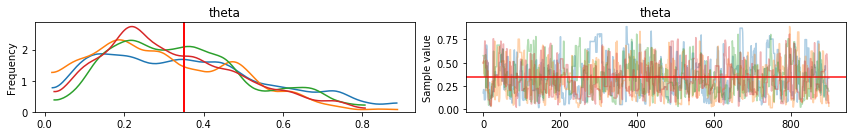

In [11]:
burnin = 100
chain = trace[burnin:]
pm.traceplot(chain, lines={'theta': theta_real})
plt.show()

Multiprocess sampling (4 chains in 4 jobs)

Metropolis: [theta]

Sampling 4 chains:   0%|          | 0/6000 [00:00<?, ?draws/s]

Sampling 4 chains:   2%|▏         | 116/6000 [00:00<00:05, 1149.69draws/s]

Sampling 4 chains:   4%|▍         | 228/6000 [00:00<00:05, 1137.50draws/s]

Sampling 4 chains:   6%|▌         | 340/6000 [00:00<00:05, 1129.13draws/s]

Sampling 4 chains:   8%|▊         | 451/6000 [00:00<00:04, 1120.27draws/s]

Sampling 4 chains:   9%|▉         | 566/6000 [00:00<00:04, 1126.05draws/s]

Sampling 4 chains:  11%|█▏        | 679/6000 [00:00<00:04, 1124.21draws/s]

Sampling 4 chains:  13%|█▎        | 790/6000 [00:00<00:04, 1116.88draws/s]

Sampling 4 chains:  15%|█▌        | 902/6000 [00:00<00:04, 1114.82draws/s]

Sampling 4 chains:  17%|█▋        | 1013/6000 [00:00<00:04, 1110.37draws/s]

Sampling 4 chains:  19%|█▊        | 1122/6000 [00:01<00:04, 1101.18draws/s]

Sampling 4 chains:  20%|██        | 1229/6000 [00:01<00:04, 1075.53draws/s]

Sampling 4 chains:  22%|██▏       | 1335/6000 [00:01<00:04, 984.68draws/s] 

Sampling 4 chains:  24%|██▍       | 1434/6000 [00:01<00:04, 930.96draws/s]

Sampling 4 chains:  25%|██▌       | 1528/6000 [00:01<00:08, 538.15draws/s]

Sampling 4 chains:  27%|██▋       | 1644/6000 [00:01<00:06, 640.33draws/s]

Sampling 4 chains:  29%|██▉       | 1760/6000 [00:01<00:05, 738.48draws/s]

Sampling 4 chains:  31%|███▏      | 1876/6000 [00:02<00:04, 827.24draws/s]

Sampling 4 chains:  33%|███▎      | 1993/6000 [00:02<00:04, 905.07draws/s]

Sampling 4 chains:  35%|███▌      | 2110/6000 [00:02<00:04, 968.87draws/s]

Sampling 4 chains:  37%|███▋      | 2226/6000 [00:02<00:03, 1016.85draws/s]

Sampling 4 chains:  39%|███▉      | 2343/6000 [00:02<00:03, 1055.84draws/s]

Sampling 4 chains:  41%|████      | 2459/6000 [00:02<00:03, 1082.35draws/s]

Sampling 4 chains:  43%|████▎     | 2577/6000 [00:02<00:03, 1107.10draws/s]

Sampling 4 chains:  45%|████▍     | 2694/6000 [00:02<00:02, 1122.34draws/s]

Sampling 4 chains:  47%|████▋     | 2809/6000 [00:02<00:02, 1124.21draws/s]

Sampling 4 chains:  49%|████▉     | 2926/6000 [00:02<00:02, 1134.60draws/s]

Sampling 4 chains:  51%|█████     | 3041/6000 [00:03<00:04, 679.47draws/s] 

Sampling 4 chains:  54%|█████▍    | 3236/6000 [00:03<00:03, 843.57draws/s]

Sampling 4 chains:  57%|█████▋    | 3430/6000 [00:03<00:02, 1014.37draws/s]

Sampling 4 chains:  60%|██████    | 3626/6000 [00:03<00:02, 1184.11draws/s]

Sampling 4 chains:  64%|██████▎   | 3822/6000 [00:03<00:01, 1341.21draws/s]

Sampling 4 chains:  67%|██████▋   | 4019/6000 [00:03<00:01, 1480.24draws/s]

Sampling 4 chains:  70%|███████   | 4216/6000 [00:03<00:01, 1596.05draws/s]

Sampling 4 chains:  74%|███████▎  | 4412/6000 [00:03<00:00, 1686.29draws/s]

Sampling 4 chains:  77%|███████▋  | 4598/6000 [00:04<00:01, 1109.00draws/s]

Sampling 4 chains:  83%|████████▎ | 4962/6000 [00:04<00:00, 1399.86draws/s]

Sampling 4 chains:  89%|████████▉ | 5350/6000 [00:04<00:00, 1729.92draws/s]

Sampling 4 chains:  96%|█████████▋| 5776/6000 [00:04<00:00, 2102.18draws/s]

Sampling 4 chains: 100%|██████████| 6000/6000 [00:04<00:00, 1237.36draws/s]

The number of effective samples is smaller than 25% for some parameters.

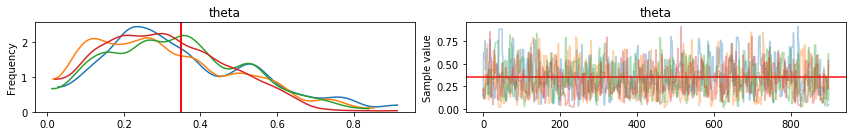

In [13]:
with our_first_model:
    step = pm.Metropolis()
    multi_trace = pm.sample(1000, step=step, njobs=4)

burnin = 100
multi_chain = multi_trace[burnin:]
pm.traceplot(multi_chain, lines={'theta': theta_real})
plt.show()

In [14]:
pm.gelman_rubin(multi_chain)

{'theta': 1.0058756898018886}

In [15]:
pm.summary(multi_chain)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
theta,0.327728,0.178938,0.006368,0.019662,0.653323,757.447287,1.005876


In [16]:
pm.df_summary(multi_chain)

AttributeError: module 'pymc3' has no attribute 'df_summary'

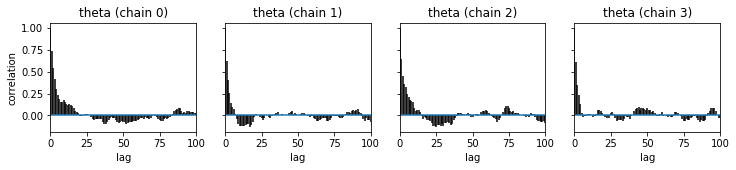

In [17]:
pm.autocorrplot(chain)
plt.show()

In [18]:
pm.effective_n(multi_chain)['theta']

757.4472866724221

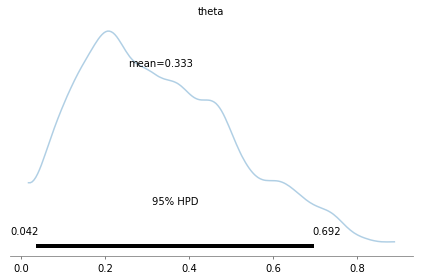

In [20]:
pm.plot_posterior(chain, kde_plot=True)
plt.show()

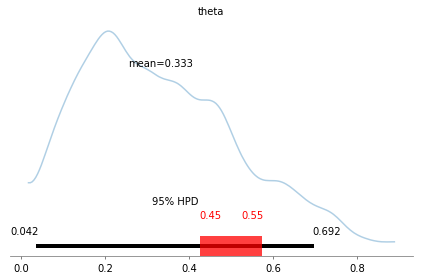

In [21]:
pm.plot_posterior(chain, kde_plot=True, rope=[0.45, 0.55])
plt.show()

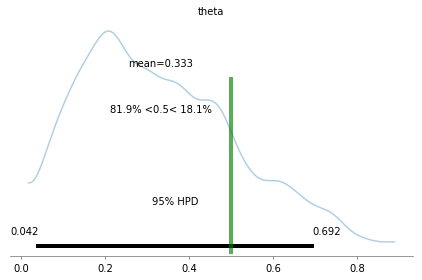

In [22]:
pm.plot_posterior(chain, kde_plot=True, ref_val=0.5)
plt.show()